In [ ]:
"""
Name: Abhishek Dhanani
Student ID: 0945075
"""

In [1]:
import tensorflow as tf
import keras.datasets

# loading the dataset
tf.keras.datasets.cifar10.load_data()

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# testing whether it raise a error or run successfuly  
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [2]:
# hyperparameters
BUFFER_SIZE = 10000
BATCH_SIZE = 64
NUM_EPOCHS = 10

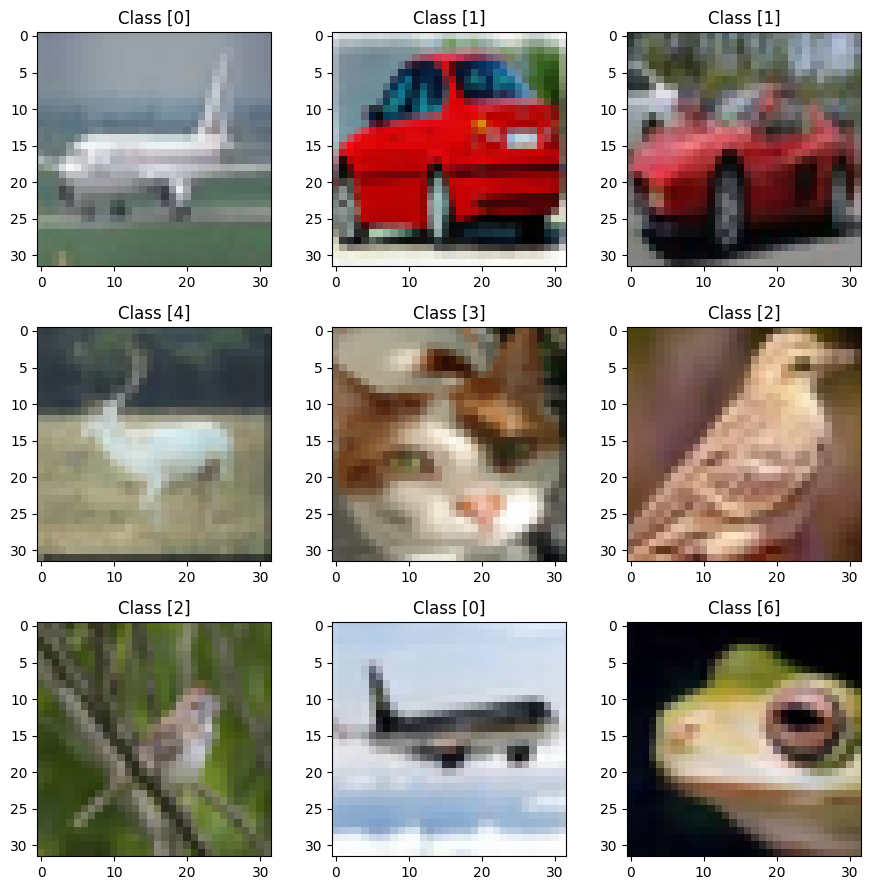

In [3]:
# ploting some of the images
import matplotlib.pyplot as plt
import random

plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(x_train))
    plt.imshow(x_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))

plt.tight_layout()

In [4]:
# Convert NumPy arrays to tf.data.Dataset
train_dataset_orig = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset_orig = tf.data.Dataset.from_tensor_slices((x_test, y_test))

train_dataset = train_dataset_orig.map(
    lambda image, label: (tf.cast(image, tf.float32) / 255.0, 
                          tf.cast(label, tf.int32)))
test_dataset = test_dataset_orig.map(
    lambda image, label: (tf.cast(image, tf.float32) / 255.0, 
                          tf.cast(label, tf.int32)))

# Shuffle training data
tf.random.set_seed(1)
train_dataset = train_dataset.shuffle(buffer_size=BUFFER_SIZE,
                                     reshuffle_each_iteration=False)

val_dataset = train_dataset.take(10000).batch(BATCH_SIZE)
train_dataset = train_dataset.skip(10000).batch(BATCH_SIZE)

In [5]:
# the model
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten, BatchNormalization, Activation, Dense, Dropout
from tensorflow.keras.models import Sequential

# Define the CNN model
model = Sequential()
# Conv Block 1
model.add(Conv2D(32, (3, 3), padding="same", input_shape=(32, 32, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Conv Block 2
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Conv Block 3
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(GlobalAveragePooling2D()) # using average pooling instead of flatten to get a smaller vector

# feed forward network
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) # same as `tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')`

history = model.fit(train_dataset, epochs=NUM_EPOCHS, 
                    validation_data=val_dataset, 
                    shuffle=True)

Epoch 1/10


625/625 [==============================] - 64s 98ms/step - loss: 1.6412 - accuracy: 0.4179 - val_loss: 1.5607 - val_accuracy: 0.4697
Epoch 2/10
625/625 [==============================] - 63s 100ms/step - loss: 1.1302 - accuracy: 0.5994 - val_loss: 1.2425 - val_accuracy: 0.5567
Epoch 3/10
625/625 [==============================] - 61s 97ms/step - loss: 0.9597 - accuracy: 0.6582 - val_loss: 1.1596 - val_accuracy: 0.6123
Epoch 4/10
625/625 [==============================] - 61s 97ms/step - loss: 0.8454 - accuracy: 0.7021 - val_loss: 0.9788 - val_accuracy: 0.6605
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 0.7638 - accuracy: 0.7323 - val_loss: 0.7591 - val_accuracy: 0.7324
Epoch 6/10
625/625 [==============================] - 61s 96ms/step - loss: 0.7016 - accuracy: 0.7552 - val_loss: 0.7432 - val_accuracy: 0.7339
Epoch 7/10
625/625 [==============================] - 61s 97ms/step - loss: 0.6547 - accuracy: 0.7735 - val_loss: 0.7142 - val_accur

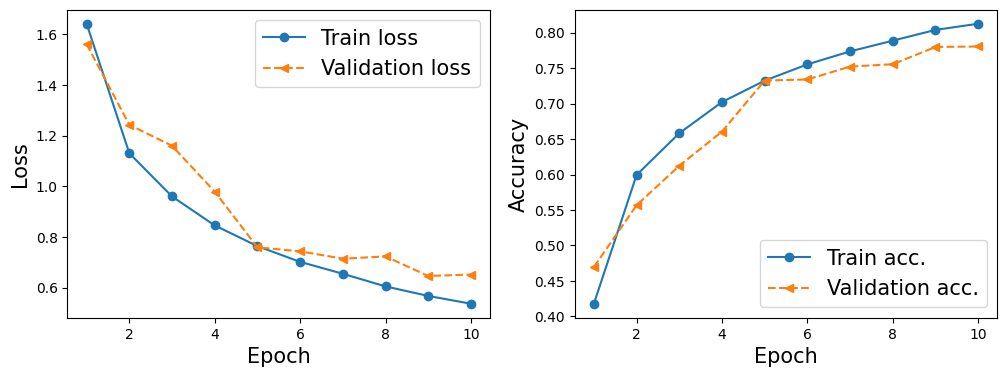

In [8]:
# ploting the training and validation loss and accuracy
import numpy as np 
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

#plt.savefig('figures/15_12.png', dpi=300)
plt.show()

In [9]:
test_results = model.evaluate(test_dataset.batch(20))
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

500/500 [==============================] - 8s 16ms/step - loss: 0.6728 - accuracy: 0.7773

Test Acc. 77.73%


TensorShape([12, 10])
tf.Tensor([3 8 8 0 6 6 9 6 3 1 0 9], shape=(12,), dtype=int64)


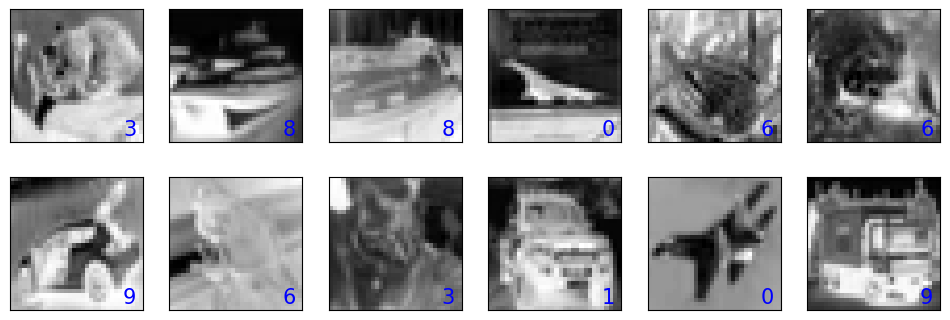

In [10]:
# testing the model 
batch_test = next(iter(test_dataset.batch(12)))

preds = model(batch_test[0])

tf.print(preds.shape)
preds = tf.argmax(preds, axis=1)
print(preds)

fig = plt.figure(figsize=(12, 4))
for i in range(12):
    ax = fig.add_subplot(2, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    img = batch_test[0][i, :, :, 0]
    ax.imshow(img, cmap='gray_r')
    ax.text(0.9, 0.1, '{}'.format(preds[i]), 
            size=15, color='blue',
            horizontalalignment='center',
            verticalalignment='center', 
            transform=ax.transAxes)
    
#plt.savefig('figures/15_13.png', dpi=300)
plt.show()

313/313 [==============================] - 6s 18ms/step


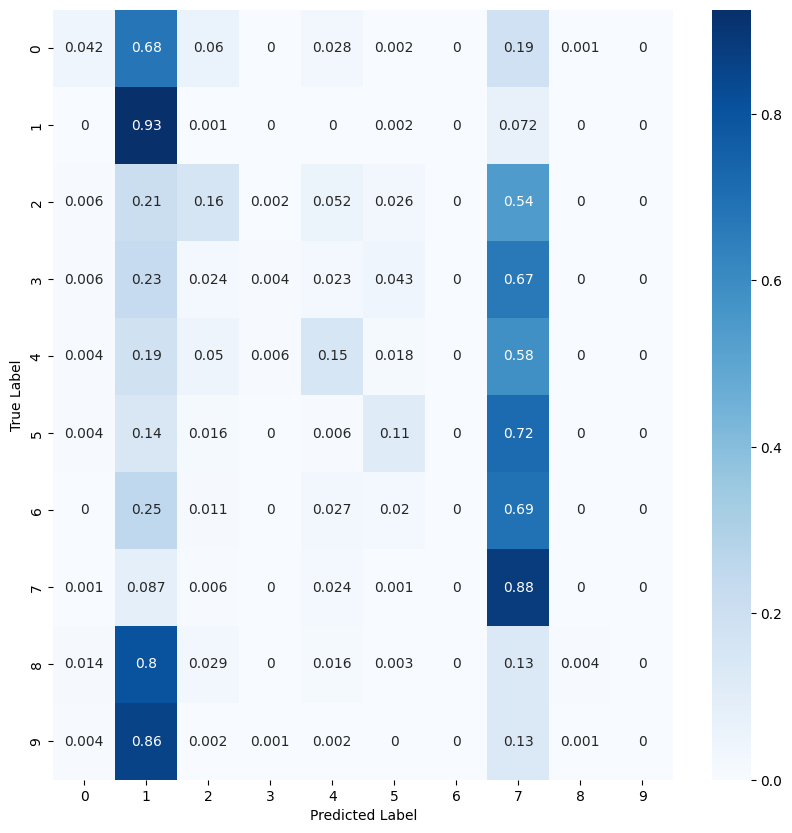

acc: 0.2282
precision:  0.32994171320623483
recall:  0.22820000000000001
f1 score: 0.14014641177869444


C:\Users\cappr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
# ploting the test results
from sklearn_evaluation import plot
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, f1_score
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 10]

pre = model.predict(x_test)
pre = tf.argmax(pre, axis=1).numpy()

# confusion matrix plot
cm = confusion_matrix(y_test, pre, normalize='true')
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


print("acc:",accuracy_score(y_test, pre))
print("precision: ",precision_score(y_test, pre, average='macro'))
print("recall: ",recall_score(y_test, pre,average='macro'))
print("f1 score:",f1_score(y_test, pre,average='macro'))

